# FER-2013 Dataset: Exploratory Data Analysis

This notebook performs exploratory data analysis on the FER-2013 (Facial Expression Recognition 2013) dataset.

## Dataset Information
- **Source**: [Kaggle - FER-2013](https://www.kaggle.com/datasets/msambare/fer2013)
- **Size**: 35,887 grayscale images (48×48 pixels)
- **Classes**: 7 emotions (Angry, Disgust, Fear, Happy, Sad, Surprise, Neutral)
- **Citation**: Goodfellow, I. J., et al. (2013). Challenges in representation learning: A report on three machine learning contests. *Neural Networks*, 64, 59-63.

## Download Instructions

To download the dataset, run the following command in your terminal:

```bash
# Install kaggle package if not already installed
pip install kaggle

# Download the dataset (requires Kaggle API credentials in ~/.kaggle/kaggle.json)
kaggle datasets download -d msambare/fer2013

# Extract to data/fer2013/
# The dataset should have the following structure:
# data/fer2013/
#   ├── train/
#   │   ├── angry/
#   │   ├── disgust/
#   │   ├── fear/
#   │   ├── happy/
#   │   ├── sad/
#   │   ├── surprise/
#   │   └── neutral/
#   └── test/
#       ├── angry/
#       ├── disgust/
#       ├── fear/
#       ├── happy/
#       ├── sad/
#       ├── surprise/
#       └── neutral/
```


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Dataset Paths and Structure


In [2]:
# Define dataset paths
BASE_DIR = Path('../data/fer2013')
TRAIN_DIR = BASE_DIR / 'train'
TEST_DIR = BASE_DIR / 'test'

# Emotion classes (7 classes)
EMOTIONS = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

print(f"Base directory: {BASE_DIR}")
print(f"Train directory exists: {TRAIN_DIR.exists()}")
print(f"Test directory exists: {TEST_DIR.exists()}")
print(f"\nEmotion classes: {EMOTIONS}")


Base directory: ../data/fer2013
Train directory exists: True
Test directory exists: True

Emotion classes: ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']


## 2. Dataset Validation and Basic Statistics


In [3]:
# Count images per class in train and test sets
def count_images_per_class(directory, emotions):
    """Count images in each emotion class directory."""
    counts = {}
    for emotion in emotions:
        emotion_dir = directory / emotion
        if emotion_dir.exists():
            # Count image files
            image_files = list(emotion_dir.glob('*.jpg')) + list(emotion_dir.glob('*.png'))
            counts[emotion] = len(image_files)
        else:
            counts[emotion] = 0
    return counts

# Get counts for train and test sets
train_counts = count_images_per_class(TRAIN_DIR, EMOTIONS)
test_counts = count_images_per_class(TEST_DIR, EMOTIONS)

# Create DataFrame for better visualization
df_train = pd.DataFrame(list(train_counts.items()), columns=['Emotion', 'Train_Count'])
df_test = pd.DataFrame(list(test_counts.items()), columns=['Emotion', 'Test_Count'])
df_counts = pd.merge(df_train, df_test, on='Emotion')
df_counts['Total'] = df_counts['Train_Count'] + df_counts['Test_Count']

print("Image counts per class:")
print(df_counts.to_string(index=False))
print(f"\nTotal train images: {df_counts['Train_Count'].sum()}")
print(f"Total test images: {df_counts['Test_Count'].sum()}")
print(f"Total images: {df_counts['Total'].sum()}")


Image counts per class:
 Emotion  Train_Count  Test_Count  Total
   angry         3995         958   4953
 disgust          436         111    547
    fear         4097        1024   5121
   happy         7215        1774   8989
     sad         4830        1247   6077
surprise         3171         831   4002
 neutral         4965        1233   6198

Total train images: 28709
Total test images: 7178
Total images: 35887


## 3. Class Distribution Analysis


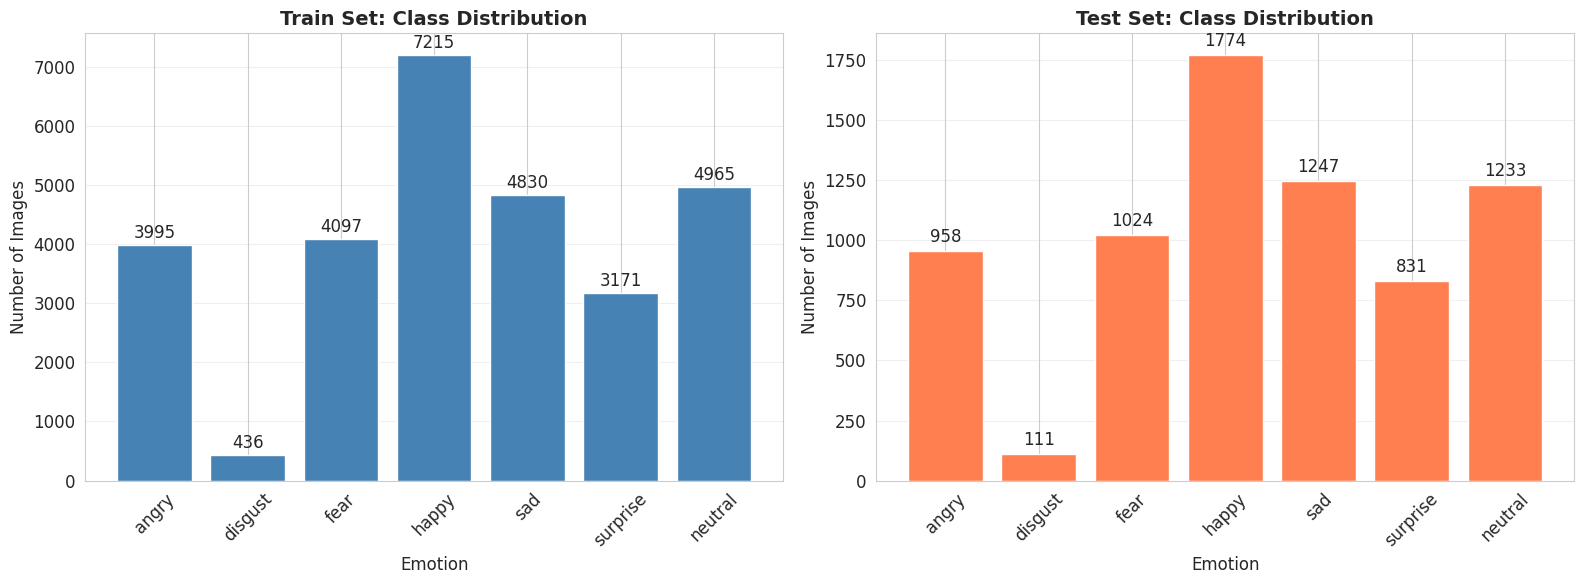

In [4]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Train set distribution
axes[0].bar(df_counts['Emotion'], df_counts['Train_Count'], color='steelblue')
axes[0].set_title('Train Set: Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Emotion', fontsize=12)
axes[0].set_ylabel('Number of Images', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(df_counts['Train_Count']):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom')

# Test set distribution
axes[1].bar(df_counts['Emotion'], df_counts['Test_Count'], color='coral')
axes[1].set_title('Test Set: Class Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Emotion', fontsize=12)
axes[1].set_ylabel('Number of Images', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(df_counts['Test_Count']):
    axes[1].text(i, v + 20, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [5]:
# Calculate class imbalance ratios
total_counts = df_counts['Total'].values
max_count = total_counts.max()
min_count = total_counts.min()
imbalance_ratios = max_count / total_counts

print("Class Imbalance Analysis:")
print("=" * 50)
for i, emotion in enumerate(EMOTIONS):
    ratio = imbalance_ratios[i]
    print(f"{emotion.capitalize():10s}: {total_counts[i]:5d} images | Imbalance ratio: {ratio:.2f}x")

print(f"\nMost imbalanced: {max_count / min_count:.2f}x difference")
print(f"\n⚠️  Note: 'Disgust' class has only {df_counts[df_counts['Emotion']=='disgust']['Total'].values[0]} images")
print("   This is significantly fewer than other classes and may need special handling.")


Class Imbalance Analysis:
Angry     :  4953 images | Imbalance ratio: 1.81x
Disgust   :   547 images | Imbalance ratio: 16.43x
Fear      :  5121 images | Imbalance ratio: 1.76x
Happy     :  8989 images | Imbalance ratio: 1.00x
Sad       :  6077 images | Imbalance ratio: 1.48x
Surprise  :  4002 images | Imbalance ratio: 2.25x
Neutral   :  6198 images | Imbalance ratio: 1.45x

Most imbalanced: 16.43x difference

⚠️  Note: 'Disgust' class has only 547 images
   This is significantly fewer than other classes and may need special handling.


## 4. Image Quality Inspection


Sample images from TRAIN set:


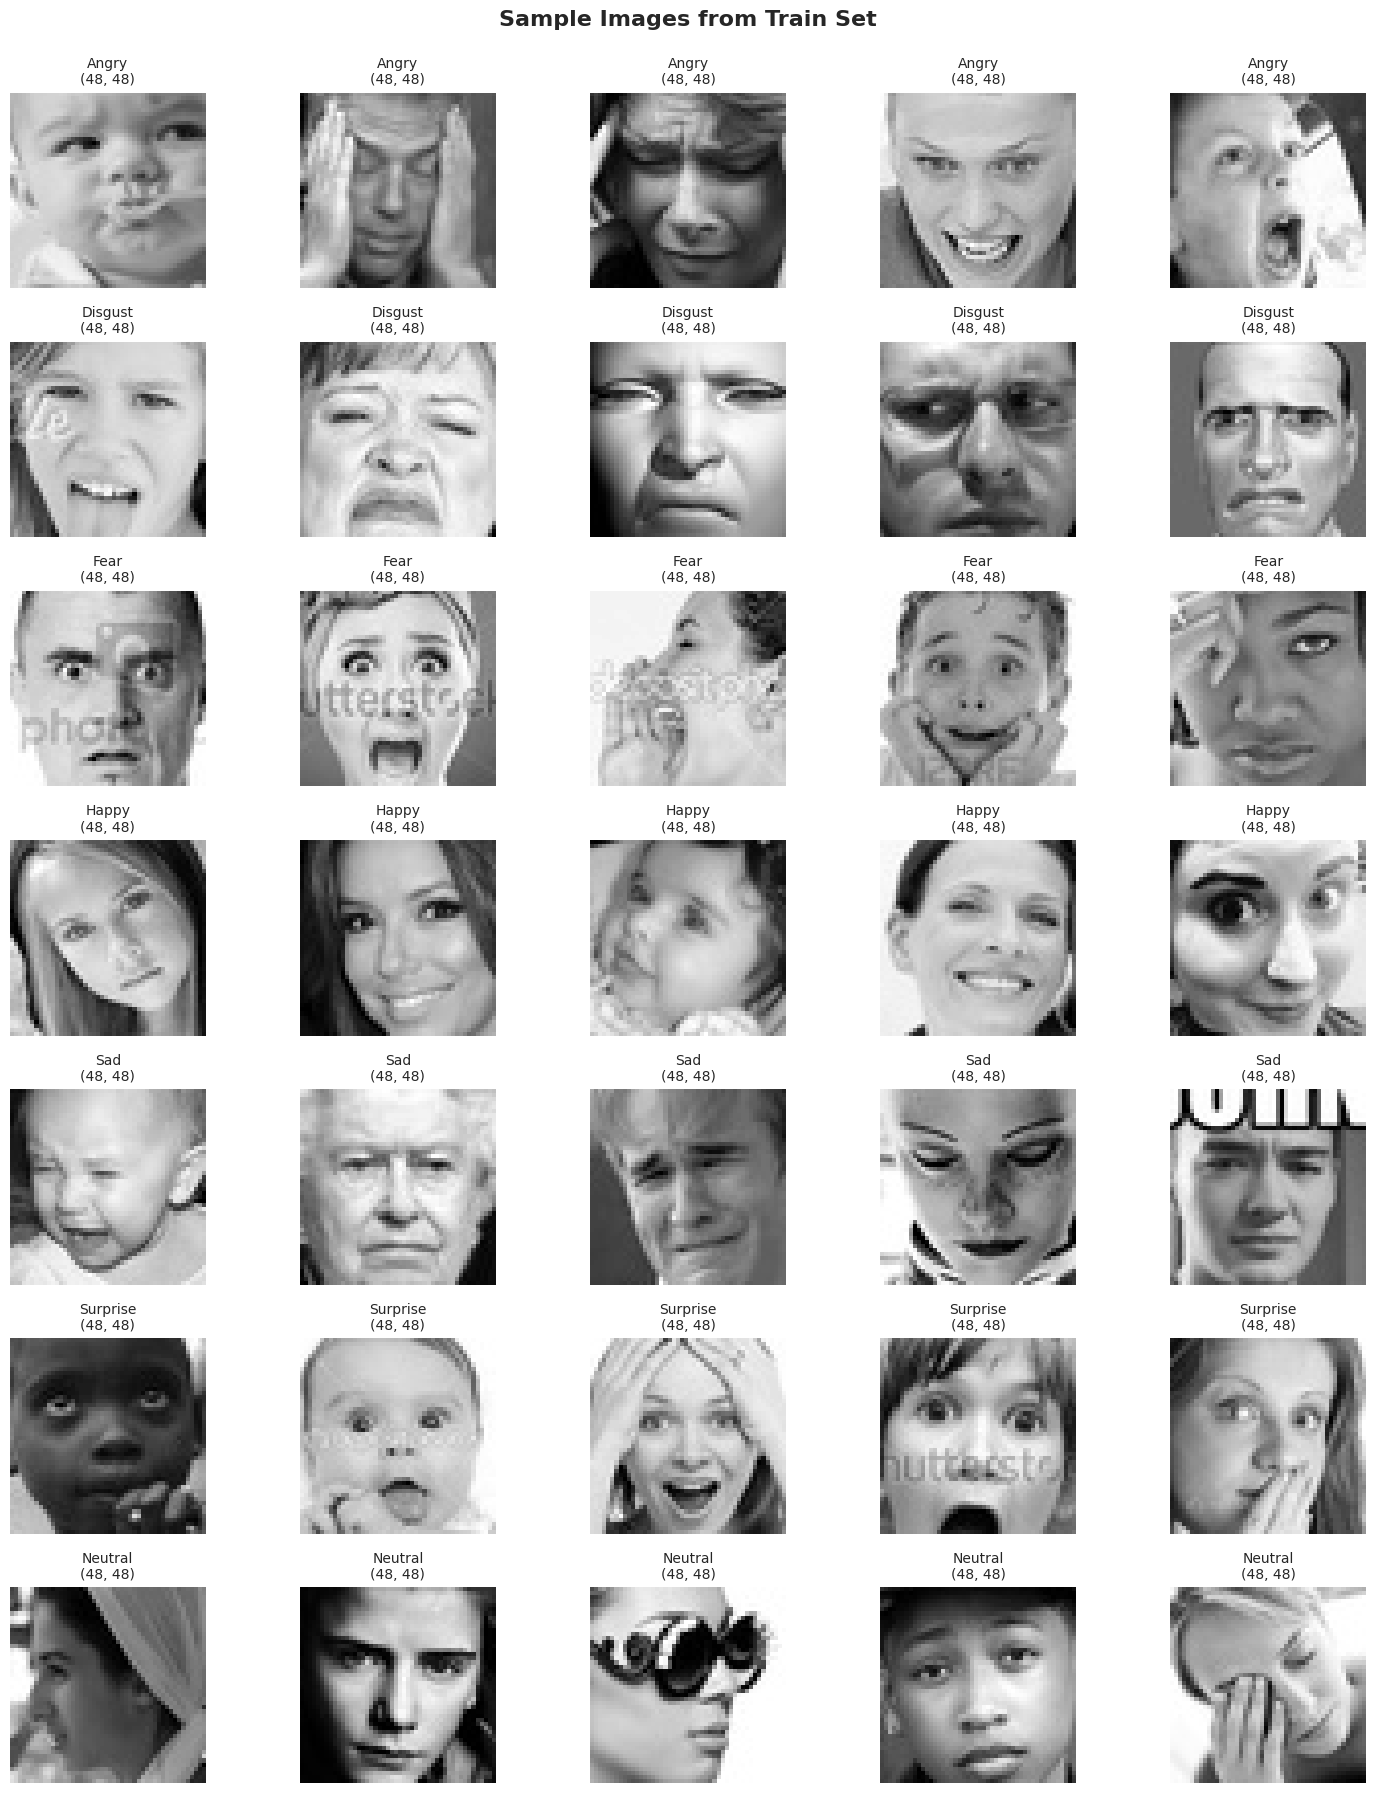

In [6]:
# Display sample images from each class
def display_samples(directory, emotions, num_samples=5):
    """Display sample images from each emotion class."""
    fig, axes = plt.subplots(len(emotions), num_samples, figsize=(15, 18))
    
    for i, emotion in enumerate(emotions):
        emotion_dir = directory / emotion
        if emotion_dir.exists():
            # Get random sample of images
            image_files = list(emotion_dir.glob('*.jpg')) + list(emotion_dir.glob('*.png'))
            if len(image_files) > 0:
                sample_files = np.random.choice(image_files, min(num_samples, len(image_files)), replace=False)
                
                for j, img_path in enumerate(sample_files):
                    try:
                        img = Image.open(img_path)
                        axes[i, j].imshow(img, cmap='gray')
                        axes[i, j].set_title(f'{emotion.capitalize()}\n{img.size}', fontsize=10)
                        axes[i, j].axis('off')
                    except Exception as e:
                        axes[i, j].text(0.5, 0.5, f'Error\n{str(e)[:20]}', 
                                       ha='center', va='center', transform=axes[i, j].transAxes)
                        axes[i, j].axis('off')
            else:
                for j in range(num_samples):
                    axes[i, j].text(0.5, 0.5, 'No images', ha='center', va='center')
                    axes[i, j].axis('off')
        else:
            for j in range(num_samples):
                axes[i, j].text(0.5, 0.5, 'Directory not found', ha='center', va='center')
                axes[i, j].axis('off')
    
    plt.suptitle(f'Sample Images from {directory.name.capitalize()} Set', fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()

# Display samples from train set
print("Sample images from TRAIN set:")
display_samples(TRAIN_DIR, EMOTIONS, num_samples=5)


In [7]:
# Check image dimensions and format
def check_image_properties(directory, emotions, sample_size=100):
    """Check properties of images in the dataset."""
    dimensions = []
    formats = []
    corrupted = []
    
    for emotion in emotions:
        emotion_dir = directory / emotion
        if emotion_dir.exists():
            image_files = list(emotion_dir.glob('*.jpg')) + list(emotion_dir.glob('*.png'))
            # Sample images for faster processing
            sample_files = np.random.choice(image_files, min(sample_size, len(image_files)), replace=False)
            
            for img_path in sample_files:
                try:
                    img = Image.open(img_path)
                    dimensions.append(img.size)
                    formats.append(img.format)
                except Exception as e:
                    corrupted.append(str(img_path))
    
    return dimensions, formats, corrupted

# Check train set properties
train_dims, train_formats, train_corrupted = check_image_properties(TRAIN_DIR, EMOTIONS, sample_size=200)

print("Image Properties Analysis:")
print("=" * 50)
print(f"Sample size checked: {len(train_dims)} images")
print(f"Unique dimensions: {set(train_dims)}")
print(f"Expected dimension: (48, 48)")
print(f"Image formats: {set(train_formats)}")
print(f"Corrupted files: {len(train_corrupted)}")
if train_corrupted:
    print(f"Corrupted files list: {train_corrupted[:5]}...")  # Show first 5


Image Properties Analysis:
Sample size checked: 1400 images
Unique dimensions: {(48, 48)}
Expected dimension: (48, 48)
Image formats: {'JPEG'}
Corrupted files: 0


## 5. Grayscale Distribution Analysis


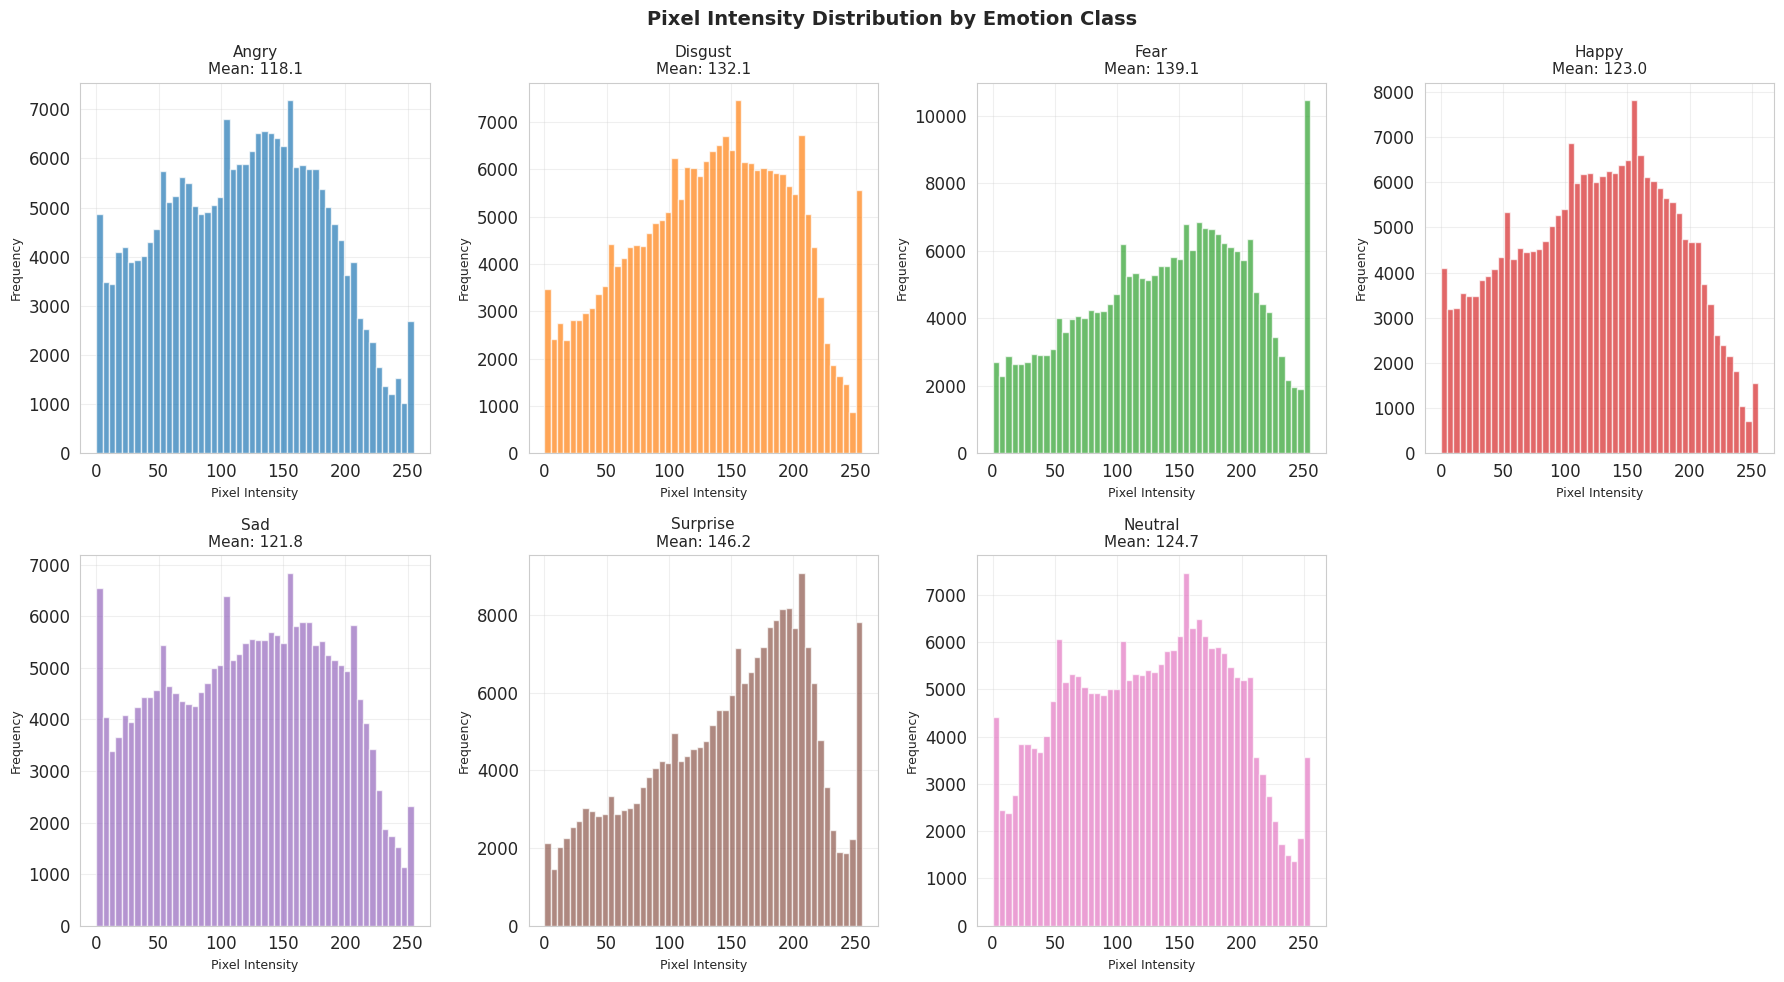

In [8]:
# Analyze pixel intensity distribution for each emotion
def analyze_pixel_distribution(directory, emotions, num_samples=50):
    """Analyze pixel intensity distribution for each emotion class."""
    fig, axes = plt.subplots(2, 4, figsize=(18, 10))
    axes = axes.flatten()
    
    for i, emotion in enumerate(emotions):
        emotion_dir = directory / emotion
        if emotion_dir.exists():
            image_files = list(emotion_dir.glob('*.jpg')) + list(emotion_dir.glob('*.png'))
            sample_files = np.random.choice(image_files, min(num_samples, len(image_files)), replace=False)
            
            all_pixels = []
            for img_path in sample_files:
                try:
                    img = np.array(Image.open(img_path))
                    all_pixels.extend(img.flatten())
                except:
                    continue
            
            if len(all_pixels) > 0:
                axes[i].hist(all_pixels, bins=50, alpha=0.7, color=plt.cm.tab10(i))
                axes[i].set_title(f'{emotion.capitalize()}\nMean: {np.mean(all_pixels):.1f}', fontsize=11)
                axes[i].set_xlabel('Pixel Intensity', fontsize=9)
                axes[i].set_ylabel('Frequency', fontsize=9)
                axes[i].grid(alpha=0.3)
    
    # Remove extra subplot
    axes[7].axis('off')
    
    plt.suptitle('Pixel Intensity Distribution by Emotion Class', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Analyze pixel distribution
analyze_pixel_distribution(TRAIN_DIR, EMOTIONS, num_samples=100)


## 6. Dataset Summary Statistics


In [9]:
# Create comprehensive summary statistics
summary_stats = {
    'Metric': [
        'Total Images',
        'Train Images',
        'Test Images',
        'Number of Classes',
        'Image Size',
        'Image Format',
        'Most Common Class',
        'Least Common Class',
        'Class Imbalance Ratio',
        'Average Images per Class (Train)',
        'Average Images per Class (Test)'
    ],
    'Value': [
        f"{df_counts['Total'].sum():,}",
        f"{df_counts['Train_Count'].sum():,}",
        f"{df_counts['Test_Count'].sum():,}",
        len(EMOTIONS),
        '48×48 pixels',
        'Grayscale (JPG/PNG)',
        df_counts.loc[df_counts['Total'].idxmax(), 'Emotion'],
        df_counts.loc[df_counts['Total'].idxmin(), 'Emotion'],
        f"{max_count / min_count:.2f}x",
        f"{df_counts['Train_Count'].mean():.0f}",
        f"{df_counts['Test_Count'].mean():.0f}"
    ]
}

df_summary = pd.DataFrame(summary_stats)
print("=" * 60)
print("DATASET SUMMARY STATISTICS")
print("=" * 60)
print(df_summary.to_string(index=False))
print("=" * 60)


DATASET SUMMARY STATISTICS
                          Metric               Value
                    Total Images              35,887
                    Train Images              28,709
                     Test Images               7,178
               Number of Classes                   7
                      Image Size        48×48 pixels
                    Image Format Grayscale (JPG/PNG)
               Most Common Class               happy
              Least Common Class             disgust
           Class Imbalance Ratio              16.43x
Average Images per Class (Train)                4101
 Average Images per Class (Test)                1025


## 7. Known Issues and Considerations

### 7.1 Class Imbalance
- **Disgust class**: Only 547 images (significantly fewer than other classes)
- **Imbalance ratio**: Up to ~16x difference between most and least common classes
- **Recommendation**: Consider class weights in loss function or data augmentation for minority classes

### 7.2 Image Quality
- **Low resolution**: 48×48 pixels (quite small for modern CNNs)
- **Grayscale images**: Will need to convert to RGB (3 channels) for EfficientNet
- **Upscaling required**: Need to resize to 224×224 for EfficientNet input

### 7.3 Label Noise
- Emotion recognition is subjective
- Some images may be mislabeled
- Cultural differences in emotion expression
- **Recommendation**: Accept some label noise as inherent to the dataset

### 7.4 Dataset Split
- Pre-split into train and test sets
- Use official test set for final evaluation
- Create validation split from training set (10% recommended)

### 7.5 Preprocessing Considerations
- Convert grayscale to RGB (repeat channel 3 times)
- Resize from 48×48 to 224×224
- Normalize with ImageNet statistics
- Apply data augmentation (horizontal flips, rotations, color jitter)


## 8. Next Steps

1. **Data Preprocessing**: 
   - Convert grayscale to RGB
   - Resize to 224×224
   - Normalize with ImageNet stats
   - Create train/validation split

2. **Model Training**:
   - Use EfficientNet-B0 with transfer learning
   - Apply class weights for imbalanced classes
   - Use data augmentation
   - Monitor for overfitting

3. **Evaluation**:
   - Test on official test set
   - Calculate per-class metrics
   - Visualize confusion matrix
   - Analyze failure cases
